# Assignment 13 : Try various CNN networks on MNIST dataset

**Objective:** Train three different CNN networks with different number of layers on the MNIST dataset.

In [0]:
#import the libraries

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten,Dense
from keras import backend
from keras import utils

In [0]:
#import the datasets

from keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [0]:
#reshape the dataset

img_rows = img_cols = 28

if backend.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [43]:
#normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /= 255
print('train data shape',x_train.shape)
print('Num samples in train set',x_train.shape[0])
print('Num samples in test set',x_test.shape[0])

train data shape (60000, 28, 28, 1)
Num samples in train set 60000
Num samples in test set 10000


In [0]:
#convert the labels to binary vectors of length len-unique labels

y_train = utils.to_categorical(Y_train,10)
y_test = utils.to_categorical(Y_test,10)


# Model_1

In [17]:
#model1
num_classes = 10
batch_size = 512
epochs = 10

model_1 = Sequential()

model_1.add(Conv2D(6,kernel_size=(5,5),activation='relu',padding='same',input_shape=input_shape))
model_1.add(BatchNormalization())

model_1.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(BatchNormalization())

model_1.add(Flatten())
model_1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(90,activation='relu',kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(10,activation='softmax'))


model_1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
hist1 = model_1.fit(x_train,y_train,validation_split=0.3,verbose=1,batch_size=batch_size,epochs=epochs)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 91s 2ms/step - loss: 0.9301 - acc: 0.7132 - val_loss: 0.2023 - val_acc: 0.9331
Epoch 2/10
42000/42000 [==============================] - 90s 2ms/step - loss: 0.2758 - acc: 0.9191 - val_loss: 0.1240 - val_acc: 0.9606
Epoch 3/10
42000/42000 [==============================] - 89s 2ms/step - loss: 0.1895 - acc: 0.9445 - val_loss: 0.1005 - val_acc: 0.9682
Epoch 4/10
42000/42000 [==============================] - 89s 2ms/step - loss: 0.1458 - acc: 0.9583 - val_loss: 0.0872 - val_acc: 0.9722
Epoch 5/10
42000/42000 [==============================] - 89s 2ms/step - loss: 0.1213 - acc: 0.9644 - val_loss: 0.0790 - val_acc: 0.9746
Epoch 6/10
42000/42000 [==============================] - 90s 2ms/step - loss: 0.1073 - acc: 0.9684 - val_loss: 0.0742 - val_acc: 0.9769
Epoch 7/10
42000/42000 [==============================] - 86s 2ms/step - loss: 0.0995 - acc: 0.9718 - val_loss: 0.0671 - val_acc

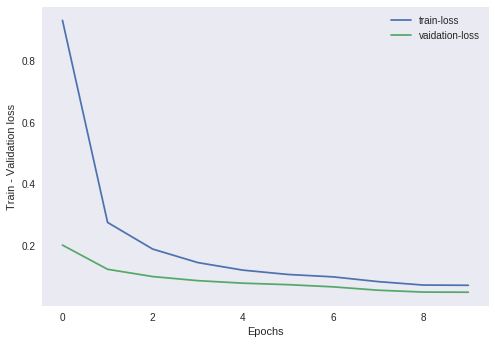

In [19]:
# Train and validation loss plot
import matplotlib.pyplot as plt

loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

plt.plot(epochs,loss,label='train-loss')
plt.plot(epochs,val_loss,label='vaidation-loss')
plt.xlabel('Epochs')
plt.ylabel('Train - Validation loss')
plt.legend()
plt.grid()
plt.show()

In [20]:
#test loss and accuracy

score = model_1.evaluate(x_test,y_test)
print('Test - loss',score[0])
print('Test - accuracy',score[1])

10000/10000 [==============================] - 8s 812us/step
Test - loss 0.039912072516081386
Test - accuracy 0.9874


Predicted label [4]
Actual value


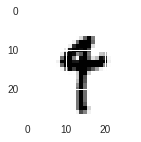

Predicted label [5]
Actual value


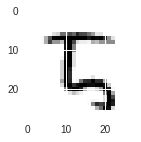

Predicted label [3]
Actual value


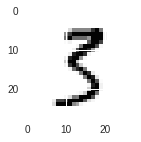

Predicted label [0]
Actual value


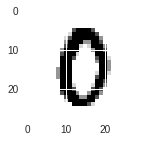

Predicted label [0]
Actual value


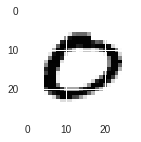

In [40]:
#prediction on random images
import numpy as np

random = np.random.randint(0,x_test.shape[0],5)

for i in random:
  pred = model_1.predict(x_test[i].reshape(1,28,28,1))
  print('Predicted label',np.where(pred[0] == np.amax(pred[0]))[0])
  print('Actual value')
  plt.figure(i,figsize=(2,2))
  plt.imshow(x_test[i].reshape(28,28))
  plt.show()

# Model_2:

In [25]:
#model2
batch_size = 512
n_epochs = 10

model_2 = Sequential()

model_2.add(Conv2D(6,kernel_size=(5,5),activation='relu',padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(10,kernel_size=(3,3),activation='relu'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(128,kernel_size=(2,2),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(BatchNormalization())

model_2.add(Flatten())

model_2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))

model_2.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))

model_2.add(Dense(10,activation='softmax'))


model_2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model_2.fit(x_train,y_train,validation_split=0.3,verbose=1,batch_size=batch_size,epochs=n_epochs)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 151s 4ms/step - loss: 0.6735 - acc: 0.7977 - val_loss: 0.1143 - val_acc: 0.9638
Epoch 2/10
42000/42000 [==============================] - 146s 3ms/step - loss: 0.1717 - acc: 0.9547 - val_loss: 0.0719 - val_acc: 0.9771
Epoch 3/10
42000/42000 [==============================] - 142s 3ms/step - loss: 0.1160 - acc: 0.9689 - val_loss: 0.0579 - val_acc: 0.9822
Epoch 4/10
42000/42000 [==============================] - 146s 3ms/step - loss: 0.0764 - acc: 0.9795 - val_loss: 0.0471 - val_acc: 0.9857
Epoch 5/10
42000/42000 [==============================] - 147s 3ms/step - loss: 0.0650 - acc: 0.9823 - val_loss: 0.0455 - val_acc: 0.9852
Epoch 6/10
42000/42000 [==============================] - 145s 3ms/step - loss: 0.0516 - acc: 0.9858 - val_loss: 0.0430 - val_acc: 0.9869
Epoch 7/10
42000/42000 [==============================] - 147s 4ms/step - loss: 0.0439 - acc: 0.9881 - val_loss: 0.0408 - 

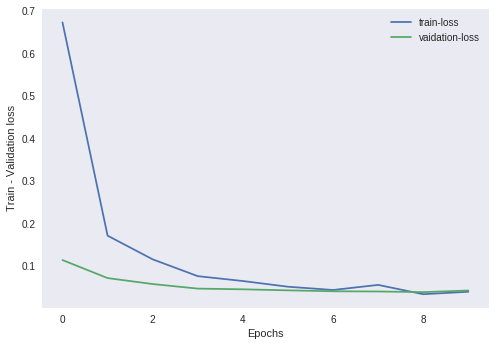

In [29]:
# Train and validation loss plot

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = list(range(n_epochs))

plt.plot(epochs,loss,label='train-loss')
plt.plot(epochs,val_loss,label='vaidation-loss')
plt.xlabel('Epochs')
plt.ylabel('Train - Validation loss')
plt.legend()
plt.grid()
plt.show()

In [30]:
score = model_2.evaluate(x_test,y_test)
print(score[0])
print(score[1])

10000/10000 [==============================] - 13s 1ms/step
0.03525445842194895
0.9887


Predicted label [4]
Actual value


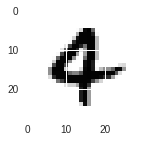

Predicted label [2]
Actual value


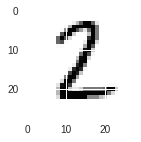

Predicted label [6]
Actual value


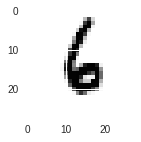

Predicted label [7]
Actual value


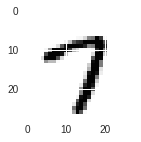

Predicted label [7]
Actual value


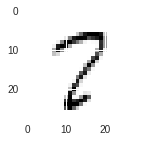

In [38]:
#prediction on random images
import numpy as np

random = np.random.randint(0,x_test.shape[0],5)

for i in random:
  pred = model_2.predict(x_test[i].reshape(1,28,28,1))
  print('Predicted label',np.where(pred[0] == np.amax(pred[0]))[0])
  print('Actual value')
  plt.figure(i,figsize=(2,2))
  plt.imshow(x_test[i].reshape(28,28))
  plt.show()

# Model_3:

In [34]:
#model3
n_epochs = 10
batch_size = 512
num_classes = 10

model_3 = Sequential()

model_3.add(Conv2D(10,kernel_size=(5,5),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(40,kernel_size=(5,5),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))#12,12
model_3.add(BatchNormalization())

model_3.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(80,kernel_size=(3,3),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(BatchNormalization())

model_3.add(Conv2D(94,kernel_size=(2,2),activation='relu'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(100,kernel_size=(2,2),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(128,kernel_size=(2,2),activation='relu',padding='same'))
model_3.add(BatchNormalization())

model_3.add(Flatten())
model_3.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(num_classes,activation='softmax'))

model_3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
hist = model_3.fit(x_train,y_train,validation_split=0.3,verbose=1,batch_size=batch_size,epochs=n_epochs)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 284s 7ms/step - loss: 0.6137 - acc: 0.8239 - val_loss: 0.0932 - val_acc: 0.9721
Epoch 2/10
42000/42000 [==============================] - 284s 7ms/step - loss: 0.1496 - acc: 0.9645 - val_loss: 0.0788 - val_acc: 0.9756
Epoch 3/10
42000/42000 [==============================] - 288s 7ms/step - loss: 0.0979 - acc: 0.9763 - val_loss: 0.0509 - val_acc: 0.9860
Epoch 4/10
42000/42000 [==============================] - 292s 7ms/step - loss: 0.0589 - acc: 0.9867 - val_loss: 0.0470 - val_acc: 0.9859
Epoch 5/10
42000/42000 [==============================] - 292s 7ms/step - loss: 0.0638 - acc: 0.9839 - val_loss: 0.0451 - val_acc: 0.9875
Epoch 6/10
42000/42000 [==============================] - 292s 7ms/step - loss: 0.0379 - acc: 0.9915 - val_loss: 0.0449 - val_acc: 0.9877
Epoch 7/10
42000/42000 [==============================] - 292s 7ms/step - loss: 0.0444 - acc: 0.9885 - val_loss: 0.0494 - 

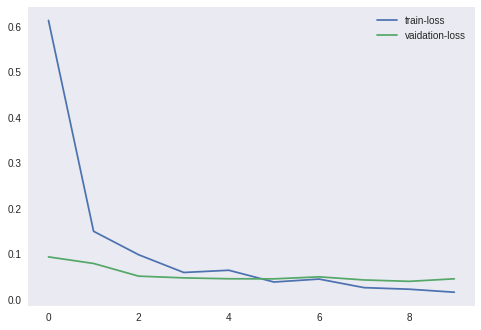

In [35]:
# Train and validation loss plot

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = np.array(range(n_epochs))

plt.plot(epochs,loss,label='train-loss')
plt.plot(epochs,val_loss,label='vaidation-loss')
plt.legend()
plt.grid()
plt.show()

In [36]:
score = model_3.evaluate(x_test,y_test)
print('Loss ',score[0])
print('Test - Accuracy ',score[1])

10000/10000 [==============================] - 22s 2ms/step
Loss  0.03419759409769904
Test - Accuracy  0.9909


Predicted label [3]
Actual value


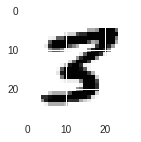

Predicted label [2]
Actual value


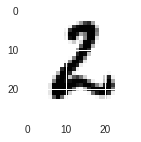

Predicted label [8]
Actual value


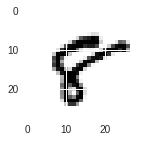

Predicted label [9]
Actual value


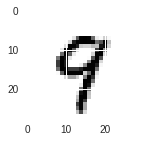

Predicted label [6]
Actual value


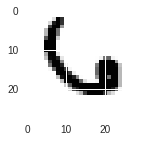

In [39]:
#prediction on random images
import numpy as np

random = np.random.randint(0,x_test.shape[0],5)

for i in random:
  pred = model_3.predict(x_test[i].reshape(1,28,28,1))
  print('Predicted label',np.where(pred[0] == np.amax(pred[0]))[0])
  print('Actual value')
  plt.figure(i,figsize=(2,2))
  plt.imshow(x_test[i].reshape(28,28))
  plt.show()

# Conclusion :

In [42]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model','Hidden-layers','Loss','Test - Accuracy']
x.add_row(['1','3','0.0399','0.9874'])
x.add_row(['2','5','0.0352','0.9887'])
x.add_row(['3','7','0.0341','0.9909'])
print(x)


+-------+---------------+--------+-----------------+
| Model | Hidden-layers |  Loss  | Test - Accuracy |
+-------+---------------+--------+-----------------+
|   1   |       3       | 0.0399 |      0.9874     |
|   2   |       5       | 0.0352 |      0.9887     |
|   3   |       7       | 0.0341 |      0.9909     |
+-------+---------------+--------+-----------------+
